In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import os
import pickle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
infile = open('/content/drive/MyDrive/x_train_file4','rb')
X = pickle.load(infile)
infile.close()

In [4]:
img_size = 224
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [5]:
infile = open('/content/drive/MyDrive/y_train_file4','rb')
y = pickle.load(infile)
infile.close()

Y = np.array(y)

In [6]:
infile = open('/content/drive/MyDrive/x_test_file','rb')
X_test = pickle.load(infile)
infile.close()

In [7]:
img_size = 224
X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)

In [8]:
infile = open('/content/drive/MyDrive/y_test_file','rb')
y_test = pickle.load(infile)
infile.close()

Y_test = np.array(y_test)

In [9]:
del y_test
del y

In [10]:
import tensorflow as tf
model = tf.keras.applications.MobileNetV2()

14548992/14536120 [==============================] - 0s 0us/step


In [11]:
base_input = model.layers[0].input
base_output = model.layers[-2].output

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation = 'softmax')(final_output)

In [14]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [15]:
new_model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

In [16]:
history = new_model.fit(X, Y, epochs = 50, validation_data =(X_test, Y_test))

Epoch 1/50
897/897 [==============================] - 360s 363ms/step - loss: 1.2464 - accuracy: 0.5292 - val_loss: 3.4476 - val_accuracy: 0.3374
Epoch 2/50
897/897 [==============================] - 321s 358ms/step - loss: 1.0721 - accuracy: 0.5991 - val_loss: 2.5546 - val_accuracy: 0.3561
Epoch 3/50
897/897 [==============================] - 321s 358ms/step - loss: 0.9970 - accuracy: 0.6241 - val_loss: 2.3950 - val_accuracy: 0.4120
Epoch 4/50
897/897 [==============================] - 321s 358ms/step - loss: 0.9361 - accuracy: 0.6531 - val_loss: 1.5995 - val_accuracy: 0.4912
Epoch 5/50
897/897 [==============================] - 322s 358ms/step - loss: 0.8790 - accuracy: 0.6735 - val_loss: 1.7943 - val_accuracy: 0.4778
Epoch 6/50
897/897 [==============================] - 321s 358ms/step - loss: 0.8321 - accuracy: 0.6887 - val_loss: 3.1920 - val_accuracy: 0.3281
Epoch 7/50
897/897 [==============================] - 321s 358ms/step - loss: 0.7814 - accuracy: 0.7088 - val_loss: 1.4451 -

In [21]:
new_model.save('/content/drive/MyDrive/fer_final.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


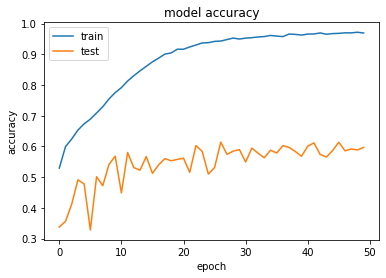

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

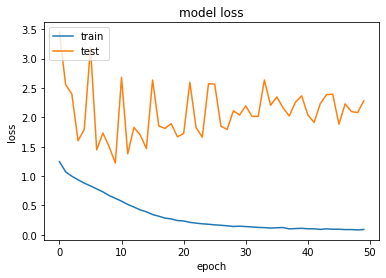

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()